<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9_DataTon/blob/main/Base_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets==2.16.1 -q
!pip install Pillow -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

train_dataset = load_dataset('svhn', 'full_numbers', split='train')
test_dataset = load_dataset('svhn', 'full_numbers', split='test')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/33402 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/13068 [00:00<?, ? examples/s]

Generating extra split:   0%|          | 0/202353 [00:00<?, ? examples/s]

In [ ]:
train_dataset

Dataset({
    features: ['image', 'digits'],
    num_rows: 33402
})

In [ ]:
test_dataset

Dataset({
    features: ['image', 'digits'],
    num_rows: 13068
})

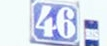

In [ ]:
train_dataset[0]['image']

In [ ]:
train_dataset[0]['digits']

{'bbox': [[38, 1, 21, 40], [57, 3, 16, 40]], 'label': [4, 6]}

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
# 이미지 자르기
image_list = []
label_list = []

for x in train_dataset:
    for i in range(len(x['digits']['bbox'])):
        x_min, y_min, width, height = x['digits']['bbox'][i]  # bounding box의 좌표를 가져옵니다.
        right = x_min + width
        lower = y_min + height
        image_list.append(x['image'].crop((x_min, y_min, right, lower)))
        label_list.append(x['digits']['label'][i])

In [ ]:
# 이미지 저장 경로
save_train_dir = '/content/save/train-images'

for i, img in enumerate(image_list):
    # 라벨에 해당하는 디렉토리 경로
    label_dir = os.path.join(save_train_dir, str(label_list[i]))

    # 라벨 디렉토리가 없으면 생성
    if not os.path.exists(label_dir):
        os.makedirs(label_dir)

    # 이미지 파일 경로
    img_path = os.path.join(label_dir, f'image_{i}.jpg')

    # 이미지 파일 저장
    img.save(img_path)

In [ ]:
# 테스트 이미지 자르기
image_test_list = []
label_test_list = []

for x in test_dataset:
    for i in range(len(x['digits']['bbox'])):
        x_min, y_min, width, height = x['digits']['bbox'][i]  # bounding box의 좌표를 가져옵니다.
        right = x_min + width
        lower = y_min + height
        image_test_list.append(x['image'].crop((x_min, y_min, right, lower)))
        label_test_list.append(x['digits']['label'][i])

In [ ]:
len(label_test_list)

26032

In [ ]:
# 이미지 저장 경로
save_test_dir = '/content/save/test-images'

for i, img in enumerate(image_test_list):
    # 라벨에 해당하는 디렉토리 경로
    label_dir = os.path.join(save_test_dir, str(label_test_list[i]))

    # 라벨 디렉토리가 없으면 생성
    if not os.path.exists(label_dir):
        os.makedirs(label_dir)

    # 이미지 파일 경로
    img_path = os.path.join(label_dir, f'image_{i}.jpg')

    # 이미지 파일 저장
    img.save(img_path)

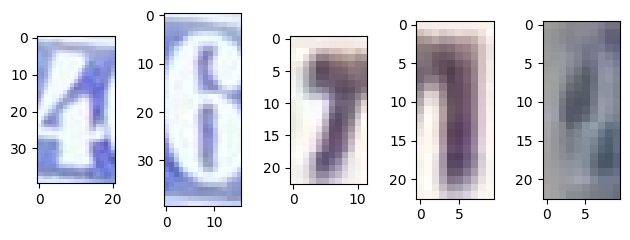

In [ ]:
fig = plt.figure()
axs = []  # Subplot Save List

for i in range(5):
    axs.append(fig.add_subplot(1, 5, i+1))
    axs[i].imshow(image_list[i])

fig.tight_layout()
plt.show()

In [ ]:
label_list[:5]

[4, 6, 7, 1, 2]

In [ ]:
# image_list[0].size[0]  # 21
# image_list[0].size[1]  # 40

size_x_list = []
size_y_list = []
for x in image_list:
    size_x_list.append(x.size[0])
    size_y_list.append(x.size[1])

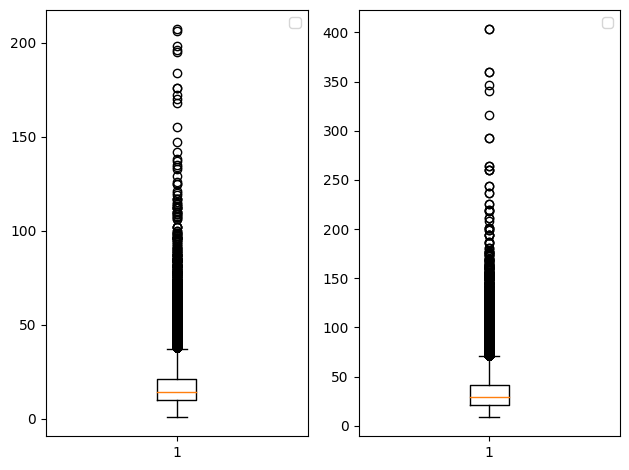

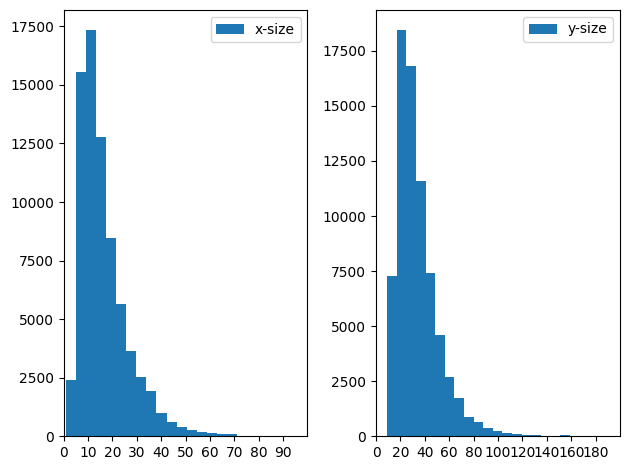

207
403
16.650490738086464
33.86131018196213


In [ ]:
plt.subplot(1, 2, 1)
plt.boxplot(size_x_list)
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(size_y_list)
plt.legend()

plt.tight_layout()
plt.show()

plt.subplot(1, 2, 1)
plt.hist(size_x_list, bins=50, label='x-size')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 10))
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(size_y_list, bins=50, label='y-size')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 20))
plt.legend()

plt.tight_layout()
plt.show()

print(max(size_x_list)) # 207
print(max(size_y_list)) # 403

print(np.mean(size_x_list)) # 16.650490738086464
print(np.mean(size_y_list)) # 33.86131018196213

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# # 이미지 리스트 리사이즈
# resized_images = [img.resize((100, 200)) for img in image_list]

# # 이미지 데이터를 Numpy 배열로 변환
# image_array = np.array([image.img_to_array(img) for img in resized_images])

# # 레이블 데이터를 Numpy 배열로 변환
# label_array = np.array(label_list)

# ImageDataGenerator를 사용하여 데이터 증강 설정
train_libdatagen = ImageDataGenerator(rescale=1/255,
                                      rotation_range=30,
                                      width_shift_range=0.1,
                                      height_shift_range=0.1,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest'
                                      )

# 데이터 증강을 적용하고 배치 단위로 제공하는 제너레이터 생성
train_generator = train_libdatagen.flow_from_directory(directory=save_train_dir,
                                                       classes=[str(i) for i in range(10)],
                                                       target_size=(150, 150),
                                                       batch_size=32,
                                                       class_mode='categorical'
                                                       )

test_validation_libdatagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

validation_generator = test_validation_libdatagen.flow_from_directory(directory=save_test_dir,
                                                                      classes=[str(i) for i in range(10)],
                                                                      target_size=(150, 150),
                                                                      batch_size=32,
                                                                      subset='validation',
                                                                      class_mode='categorical'
                                                                      )

test_generator = test_validation_libdatagen.flow_from_directory(directory=save_test_dir,
                                                                classes=[str(i) for i in range(10)],
                                                                target_size=(150, 150),
                                                                batch_size=32,
                                                                subset='training',
                                                                class_mode='categorical'
                                                                )



Found 73257 images belonging to 10 classes.
Found 5201 images belonging to 10 classes.
Found 20831 images belonging to 10 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
# from keras.applications import VGG16
from keras.utils import to_categorical

# 진행사항 표시
from keras.callbacks import Callback
from tqdm import tqdm
from time import time

In [ ]:
class TqdmProgressCallback(Callback):

    def on_train_begin(self, logs=None):
        self.epochs = self.params['epochs']
        self.start_time = time()
        self.times = []

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time()
        print('\nEpoch %d/%d' % (epoch + 1, self.epochs))
        self.tqdm_bar = tqdm(total=self.params['steps'], position=0, leave=True)
        self.logs = {}

    def on_batch_end(self, batch, logs={}):
        self.tqdm_bar.update()
        self.logs = logs

    def on_epoch_end(self, epoch, logs={}):
        self.tqdm_bar.close()
        epoch_time = time() - self.epoch_start_time
        self.times.append(epoch_time)
        avg_time_per_epoch = sum(self.times) / len(self.times)
        remaining_time = avg_time_per_epoch * (self.epochs - epoch - 1)
        total_time = time() - self.start_time
        print(' - loss: %.4f - acc: %.4f - val_loss: %.4f - val_acc: %.4f - epoch_time: %.4f s - total_time: %.4f s - remaining_time: %.4f s' %
              (logs['loss'], logs['acc'], logs['val_loss'], logs['val_acc'], epoch_time, total_time, remaining_time))

In [ ]:
# Pretrained Network VGG16
# model_base = VGG16(weights='imagenet',
#                    include_top=False,
#                    input_shape=(224,224,3))

from keras.applications import Xception
model_base = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=(150,150,3))

model_base.trainable = False   # Convolution Layer 동결!
model_base.summary()

 45%|████▍     | 1026/2290 [14:17<17:36,  1.20it/s]


83683744/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 74, 74, 32)           864       ['input_3[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 74, 74, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activat

In [ ]:
# 모델을 완성하면 되요!
model = Sequential()

model.add(model_base)  # 우리 모델의 앞부분에 pretrained network을 삽입!

# classifier를 구현

model.add(Flatten())

# Hidden Layer
model.add(Dense(units=512,
                activation='relu'))

model.add(Dropout(rate=0.5))

# Output Layer
model.add(Dense(units=10,
                activation='softmax'))

# model.summary()

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               26214912  
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 47081522 (179.60 MB)
Trainable params: 26220042 (100.02 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=2290,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=163,
                    verbose=0,
                    callbacks=[TqdmProgressCallback()]
                    )


Epoch 1/10


100%|██████████| 2290/2290 [08:52<00:00,  4.30it/s]


 - loss: 1.5764 - acc: 0.4560 - val_loss: 1.1428 - val_acc: 0.6082 - epoch_time: 532.8397 s - total_time: 532.9327 s - remaining_time: 4795.5570 s

Epoch 2/10


 43%|████▎     | 981/2290 [03:36<05:51,  3.72it/s]

In [ ]:
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

train_acc = history.history['acc']
valid_acc = history.history['val_acc']

plt.plot(train_loss,
         'o',
         color='r',
         label='training loss')
plt.plot(valid_loss,
         color='b',
         label='validation loss')
plt.legend()
plt.show()

plt.plot(train_acc,
         'o',
         color='r',
         label='training accuracy')
plt.plot(valid_acc,
         color='b',
         label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# model.save('/content/drive/MyDrive/DataTon/model/try_2(res50).h5')
model.save('/content/drive/MyDrive/DataTon/model/try_3_res50.keras')

In [ ]:
min_train_loss = min(history.history['loss'])
min_valid_loss = min(history.history['val_loss'])

# 훈련 및 검증 정확도의 최대값
max_train_acc = max(history.history['acc'])
max_valid_acc = max(history.history['val_acc'])

# ResNet50의 최대 정확도 값
resnet50_max_acc = max(history.history['val_acc'])

print("Train Loss 최소값:", min_train_loss)
print("Valid Loss 최소값:", min_valid_loss)
print("Train Accuracy 최대값:", max_train_acc)
print("Valid Accuracy 최대값:", max_valid_acc)
print("ResNet50 + classifier Max ACC :", resnet50_max_acc)

In [ ]:
# Fine Tuning
# 이미 위쪽에서 학습이 한번 끝났기 때문에 여기에 추가적으로
# 상위 convolution layer의 동결을 풀고 학습을 한번더 수행하면 되요!

# 먼저 파일로 저장되어 있는 model을 loading해요!
# from keras.models import load_model

# model = load_model('/content/drive/MyDrive/my_ws/project/dataton/save-model/02.13_model.h5')

# model.summary()

# # 여기까지가 한번 Transfer Learning을 이용해서 학습이 완료된 상태예요!
# # 추가적인 작업이 필요한데.. 일부 layer에 대한 동결을 해제해야 해요!
# # Pretrained Network
# model_base = ResNet50(weights='imagenet',
#                    include_top=False,
#                    input_shape=(224,224,3))

# model_base.trainable = False   # Convolution Layer 동결!

# for layer in model_base.layers:
#     if layer.name in ['block5_conv1', 'block5_conv2', 'block5_conv3']:
#         layer.trainable = True  # 이렇게 하면 해당 layer의 동결이 풀려야 되요!
#     else:
#         layer.trainable = False

# # 이렇게 모델을 다시 만들고 학습을 한번 더 진행하면 되요!
# # => fine tuing! (큰 변화는 아니지만 어느정도 모델의 정확도를 올릴 수 있어요!)

# model_base.summary()

# 동결 해제
# model_base.trainable = True

# set_trainable = False
# for layer in model_base.layers:
#     if layer.name == 'block14_sepconv1':
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False